In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score

data = pd.read_csv('../../../mon.csv')

In [4]:
descriptive_stats = data.describe()
print(descriptive_stats)

       Total Packets  Incoming Packets  Outgoing Packets  Incoming Ratio  \
count   19000.000000      19000.000000      19000.000000    19000.000000   
mean     4188.808526        347.962684       3840.845842        0.097827   
std      3206.123258        289.852424       2991.553668        0.046691   
min        50.000000          6.000000         25.000000        0.029521   
25%      1529.750000        137.000000       1374.750000        0.064862   
50%      3309.000000        281.000000       3007.500000        0.089830   
75%      6378.000000        486.000000       5773.250000        0.119511   
max      9993.000000       4241.000000       9698.000000        0.507246   

       Outgoing Ratio  Outgoing Std  Outgoing Mean  Packets per Second  \
count    19000.000000  19000.000000   19000.000000        19000.000000   
mean         0.902173   1290.778723    2056.481250          223.931263   
std          0.046691    969.399246    1620.844024          274.470064   
min          0.4927

#기존 데이터에서 DecisionTree

##노드 분할 기준으로 지니계수 사용(디폴트)

In [5]:
X = data.drop(columns=['Label'])
y = data['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dt_classifier = DecisionTreeClassifier(random_state=42)

dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1_weighted = f1_score(y_test, y_pred, average='weighted')
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Weighted F1 Score:", f1_weighted)
print("Classification Report:\n", classification_rep)

Accuracy: 0.6435087719298246
Weighted F1 Score: 0.643921931860872
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50        62
           1       0.65      0.56      0.60        59
           2       0.75      0.73      0.74        55
           3       0.52      0.67      0.58        46
           4       0.60      0.77      0.68        53
           5       0.63      0.78      0.70        63
           6       0.74      0.75      0.75        65
           7       0.78      0.72      0.75        64
           8       0.70      0.63      0.66        59
           9       0.48      0.66      0.55        47
          10       0.66      0.67      0.66        66
          11       0.60      0.60      0.60        57
          12       0.85      0.80      0.82        59
          13       0.33      0.41      0.37        54
          14       0.49      0.62      0.55        58
          15       0.62      0.68      0.65  

##노드 분할 기준으로 엔트로피 사용
    

In [8]:
# 엔트로피를 사용하여 트리 초기화
dt_classifier = DecisionTreeClassifier(criterion="entropy", random_state=42)

dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1_weighted = f1_score(y_test, y_pred, average='weighted')  # weighted 방식으로 F1 점수 계산
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Weighted F1 Score:", f1_weighted)
print("Classification Report:\n", classification_rep)

Accuracy: 0.6607017543859649
Weighted F1 Score: 0.6609010023357238
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.48      0.50        62
           1       0.70      0.56      0.62        59
           2       0.71      0.76      0.74        55
           3       0.57      0.63      0.60        46
           4       0.68      0.85      0.76        53
           5       0.64      0.70      0.67        63
           6       0.81      0.78      0.80        65
           7       0.66      0.55      0.60        64
           8       0.65      0.59      0.62        59
           9       0.44      0.53      0.48        47
          10       0.68      0.62      0.65        66
          11       0.69      0.65      0.67        57
          12       0.90      0.80      0.85        59
          13       0.38      0.48      0.42        54
          14       0.60      0.62      0.61        58
          15       0.67      0.61      0.64 

#성능 개선 - Feature Selection


               Feature  Importance
6        Outgoing Mean    0.151319
11   Inter-arrival Std    0.091396
1     Incoming Packets    0.090530
12  Concentration Mean    0.084061
9    First 30 Outgoing    0.081251
0        Total Packets    0.079526
14     Alternative Sum    0.072048
5         Outgoing Std    0.070430
3       Incoming Ratio    0.063093
13   Concentration Std    0.056176
2     Outgoing Packets    0.047807
8    First 30 Incoming    0.032620
4       Outgoing Ratio    0.028523
10  Inter-arrival Mean    0.028450
7   Packets per Second    0.022772


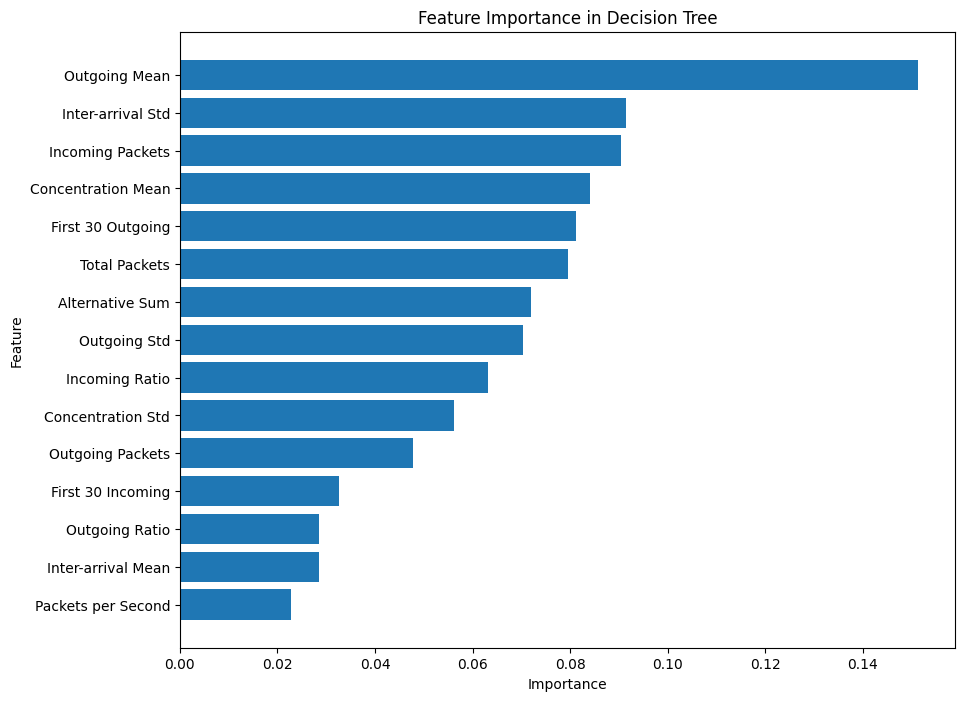

In [10]:
# 특성 중요도 추출
feature_importances = dt_classifier.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

# 특성 중요도 시각화
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Decision Tree')
plt.gca().invert_yaxis()
plt.show()


In [11]:
# 1. 누적 중요도 90% 기준으로 선택
importance_df['Cumulative Importance'] = importance_df['Importance'].cumsum()
selected_features_90_percent = importance_df[importance_df['Cumulative Importance'] <= 0.9]['Feature'].values

print("\n누적 중요도 90% 기준으로 선택된 특성들:")
print(selected_features_90_percent)

# 2. 상위 5개 특성 선택
selected_features_top_5 = importance_df['Feature'].head(5).values

print("\n상위 5개 특성 기준으로 선택된 특성들:")
print(selected_features_top_5)


누적 중요도 90% 기준으로 선택된 특성들:
['Outgoing Mean' 'Inter-arrival Std' 'Incoming Packets'
 'Concentration Mean' 'First 30 Outgoing' 'Total Packets'
 'Alternative Sum' 'Outgoing Std' 'Incoming Ratio' 'Concentration Std'
 'Outgoing Packets']

상위 5개 특성 기준으로 선택된 특성들:
['Outgoing Mean' 'Inter-arrival Std' 'Incoming Packets'
 'Concentration Mean' 'First 30 Outgoing']


##누적 중요도 90% 로 feature selection

In [19]:
# 누적 중요도 90% 특성
X_selected_90_percent = X[selected_features_90_percent]

# 학습 및 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_selected_90_percent, y, test_size=0.3, random_state=42)

# 새로운 모델 학습
DecisionTreeClassifier(criterion="entropy", random_state=42)
dt_classifier_selected.fit(X_train, y_train)

# 예측 및 평가
y_pred_selected = dt_classifier_selected.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1_weighted = f1_score(y_test, y_pred, average='weighted')  # weighted 방식으로 F1 점수 계산
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Weighted F1 Score:", f1_weighted)
print("Classification Report:\n", classification_rep)

Accuracy: 0.6435087719298246
Weighted F1 Score: 0.643921931860872
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50        62
           1       0.65      0.56      0.60        59
           2       0.75      0.73      0.74        55
           3       0.52      0.67      0.58        46
           4       0.60      0.77      0.68        53
           5       0.63      0.78      0.70        63
           6       0.74      0.75      0.75        65
           7       0.78      0.72      0.75        64
           8       0.70      0.63      0.66        59
           9       0.48      0.66      0.55        47
          10       0.66      0.67      0.66        66
          11       0.60      0.60      0.60        57
          12       0.85      0.80      0.82        59
          13       0.33      0.41      0.37        54
          14       0.49      0.62      0.55        58
          15       0.62      0.68      0.65  

개선 X

##상위 5개 특성으로 feature selection

In [22]:
# 상위 5개 특성
X_selected_features_top_5  = X[selected_features_top_5 ]

X_train, X_test, y_train, y_test = train_test_split(X_selected_features_top_5, y, test_size=0.3, random_state=42)

DecisionTreeClassifier(criterion="entropy", random_state=42)
dt_classifier_selected.fit(X_train, y_train)

y_pred_selected = dt_classifier_selected.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1_weighted = f1_score(y_test, y_pred, average='weighted')  # weighted 방식으로 F1 점수 계산
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Weighted F1 Score:", f1_weighted)
print("Classification Report:\n", classification_rep)

Accuracy: 0.6435087719298246
Weighted F1 Score: 0.643921931860872
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50        62
           1       0.65      0.56      0.60        59
           2       0.75      0.73      0.74        55
           3       0.52      0.67      0.58        46
           4       0.60      0.77      0.68        53
           5       0.63      0.78      0.70        63
           6       0.74      0.75      0.75        65
           7       0.78      0.72      0.75        64
           8       0.70      0.63      0.66        59
           9       0.48      0.66      0.55        47
          10       0.66      0.67      0.66        66
          11       0.60      0.60      0.60        57
          12       0.85      0.80      0.82        59
          13       0.33      0.41      0.37        54
          14       0.49      0.62      0.55        58
          15       0.62      0.68      0.65  

퇴화함..

#성능개선 : 데이터 정규화하기
일부 특성(예: Total Packets, Outgoing Packets, Packets per Second)은 값의 범위가 넓고 비대칭적인 분포를 보입니다.이러한 특성들은 정규화를 통해 데이터의 스케일을 조정하면 모델 성능에 도움이 될 수 있습니다.

##StandardScaler 정규화

In [14]:
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('mon.csv')

# 정규화할 특성들만 선택 (레이블은 제외)
features = data.drop(columns=['Label'])
labels = data['Label'].copy()

# Standard 정규화
standard_scaler = StandardScaler()
features_standard_scaled = standard_scaler.fit_transform(features)
data_standard_scaled = pd.DataFrame(features_standard_scaled, columns=features.columns)
data_standard_scaled['Label'] = labels  # 레이블 추가

print("\nStandard 정규화 결과 (상위 5개 샘플):")
print(data_standard_scaled.head())


Standard 정규화 결과 (상위 5개 샘플):
   Total Packets  Incoming Packets  Outgoing Packets  Incoming Ratio  \
0      -0.863311         -0.783049         -0.849362       -0.271499   
1      -1.144967         -0.924504         -1.137514        1.212536   
2      -0.882961         -0.793399         -0.869419       -0.234206   
3      -0.855513         -0.779599         -0.841339       -0.288218   
4      -0.867990         -0.803750         -0.852371       -0.343442   

   Outgoing Ratio  Outgoing Std  Outgoing Mean  Packets per Second  \
0        0.271499     -0.799789      -0.791682           -0.305299   
1       -1.212536     -1.187929      -1.129268           -0.630129   
2        0.234206     -0.843888      -0.783792           -0.370538   
3        0.288218     -0.801407      -0.762797           -0.421542   
4        0.343442     -0.811643      -0.781633           -0.334429   

   First 30 Incoming  First 30 Outgoing  Inter-arrival Mean  \
0           0.566225          -0.566225           -0.2

In [15]:
X = data_standard_scaled.drop(columns=['Label'])
y = data_standard_scaled['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dt_classifier = DecisionTreeClassifier(criterion="entropy", random_state=42)

dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1_weighted = f1_score(y_test, y_pred, average='weighted')  # weighted 방식으로 F1 점수 계산
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Weighted F1 Score:", f1_weighted)
print("Classification Report:\n", classification_rep)

Accuracy: 0.6603508771929825
Weighted F1 Score: 0.660551781633141
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.48      0.50        62
           1       0.70      0.56      0.62        59
           2       0.71      0.76      0.74        55
           3       0.57      0.63      0.60        46
           4       0.68      0.85      0.76        53
           5       0.65      0.70      0.67        63
           6       0.81      0.78      0.80        65
           7       0.66      0.55      0.60        64
           8       0.64      0.59      0.61        59
           9       0.44      0.53      0.48        47
          10       0.69      0.62      0.66        66
          11       0.69      0.65      0.67        57
          12       0.90      0.80      0.85        59
          13       0.38      0.48      0.42        54
          14       0.60      0.62      0.61        58
          15       0.67      0.61      0.64  

#성능 개선-하이퍼파라미터 튜닝

파라미터
- 트리 깊이 제한 (max_depth): 트리의 최대 깊이를 제한하면 과적합을 줄여 성능이 안정화될 수 있습니다.
- 최소 샘플 분할 수 (min_samples_split): 노드를 분할하기 위한 최소 샘플 수를 증가시키면 트리가 덜 복잡해져 과적합이 줄어듭니다.
- 최소 샘플 리프 노드 수 (min_samples_leaf): 리프 노드에 있어야 하는 최소 샘플 수를 설정하면, 리프 노드가 너무 작은 샘플에 맞춰져 과적합되는 것을 방지할 수 있습니다.

##원래 데이터 mon.csv 사용

In [23]:
from sklearn.model_selection import train_test_split, GridSearchCV

X = data.drop(columns=['Label'])
y = data['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 하이퍼파라미터 그리드 설정
param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 10, 20, 30],
    'min_samples_leaf': [1, 5, 10, 15]
}

DecisionTreeClassifier(criterion="entropy", random_state=42)
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1_weighted = f1_score(y_test, y_pred, average='weighted')
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Weighted F1 Score:", f1_weighted)
print("Classification Report:\n", classification_rep)

Accuracy: 0.6435087719298246
Weighted F1 Score: 0.643921931860872
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50        62
           1       0.65      0.56      0.60        59
           2       0.75      0.73      0.74        55
           3       0.52      0.67      0.58        46
           4       0.60      0.77      0.68        53
           5       0.63      0.78      0.70        63
           6       0.74      0.75      0.75        65
           7       0.78      0.72      0.75        64
           8       0.70      0.63      0.66        59
           9       0.48      0.66      0.55        47
          10       0.66      0.67      0.66        66
          11       0.60      0.60      0.60        57
          12       0.85      0.80      0.82        59
          13       0.33      0.41      0.37        54
          14       0.49      0.62      0.55        58
          15       0.62      0.68      0.65  

##StandardScaler 적용한 데이터 사용

In [24]:
X = data_standard_scaled.drop(columns=['Label'])
y = data_standard_scaled['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 하이퍼파라미터 그리드 설정
param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 10, 20, 30],
    'min_samples_leaf': [1, 5, 10, 15]
}

DecisionTreeClassifier(criterion="entropy", random_state=42)
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1_weighted = f1_score(y_test, y_pred, average='weighted')
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Weighted F1 Score:", f1_weighted)
print("Classification Report:\n", classification_rep)

Accuracy: 0.6433333333333333
Weighted F1 Score: 0.6437389832077334
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50        62
           1       0.65      0.56      0.60        59
           2       0.74      0.73      0.73        55
           3       0.52      0.67      0.58        46
           4       0.61      0.77      0.68        53
           5       0.63      0.78      0.70        63
           6       0.74      0.75      0.75        65
           7       0.78      0.72      0.75        64
           8       0.69      0.63      0.65        59
           9       0.48      0.66      0.55        47
          10       0.65      0.65      0.65        66
          11       0.60      0.60      0.60        57
          12       0.85      0.80      0.82        59
          13       0.33      0.41      0.37        54
          14       0.49      0.62      0.55        58
          15       0.63      0.69      0.66 